### Importar librerias

Se muestran las librerías que se utilizarán en el proyecto.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, roc_auc_score,  precision_recall_curve
)
import seaborn as sns
from imblearn.over_sampling import SMOTE

### Leer la bases de datos

El fraude de las trajetas de crédito es un problema significativo en el sector financiero que conlleva perdidas globales de más de millones de dolares. Es importante mencionar que cuando hay más desarollo de la banca digital hay nuevas formas de hacer este tipo de operaciones lo que requiere soluciones modernas y eficientes para la toma adecuada de desiciones por ello se aplicará un modelo de machine learning llamado regresión logistica. Se tomo este dataset de Kaggle y se utilizará en el reporte. A continuacion se muestra

In [62]:
df = pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Procesamiento de datos

In [49]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


En esta base de datos se muestran datos acerca de movimientos que han sido detectados como fraude y otros que no lo son. Los nombres de las variables se han protegido haciendo que no les podamos dar una justa interpretación y solo se puede interpretar la cantidad, que nos dice de cuanto fue la transacción. Por lo que tenemos una base de datos que nos ayudará a la detección de fraude en tarjetas de crédito.

Ahora se hará la visualización de los datos para conocer si se esta trabajando con datos balanceados o no balanceados.

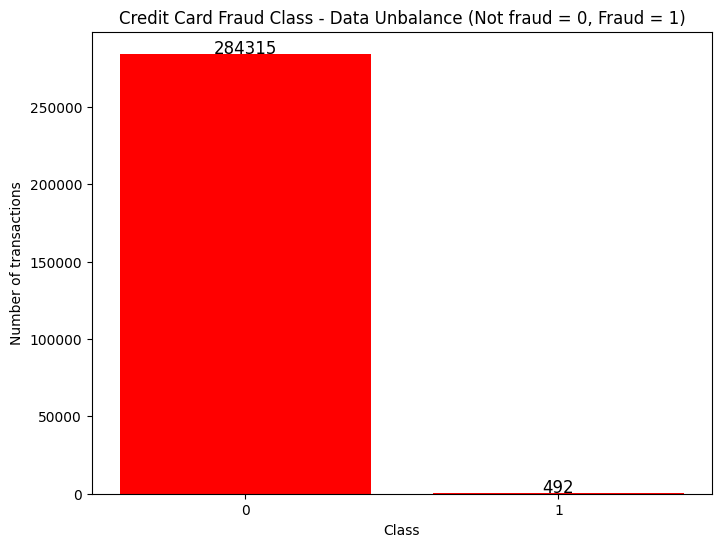

In [55]:
temp = df["Class"].value_counts()
graph = pd.DataFrame({'Class': temp.index, 'values': temp.values})

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(graph['Class'], graph['values'], color='red')

# Agregar etiquetas de valores
for i, v in enumerate(graph['values']):
    plt.text(graph['Class'][i], v + 50, str(v), ha='center', fontsize=12)

# Configurar etiquetas y título
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.title('Credit Card Fraud Class - Data Unbalance (Not fraud = 0, Fraud = 1)')
plt.xticks(graph['Class'])  

# Mostrar la gráfica
plt.show()

Se observa que hay desbalanceo de clases en la información dada por lo que es importante el poder manejarlo de manera adecuada para poder realizar una solución viable. Por lo que se hará el ejercicio con los datos originales y posteriormente se usará el algoritmo SMOTE para hacer dicha correción y de esta forma compararlos.

### Definir las características (X) y la variable objetivo (y)

Una vez que se ha explorado la base de datos y se conoce que se quiere realizar es importante declarar las variables que serán usadas para predecir y la variable de respuesta para poder generar un modelo optimo.

In [45]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19','V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

### Realizacion del código sin balance

Se pueden usar los siguientes modelos para la solución del problema.

Modelos supervisados: Árboles de decisión, Random Forest, Gradient Boosting (XGBoost), Redes Neuronales, entre otros.

Modelos no supervisados: Análisis de detección de anomalías como Isolation Forest o Autoencoders.

Técnicas de manejo de datos desbalanceados: SMOTE, focal loss, cost-sensitive learning.

Explicabilidad del modelo: SHAP, LIME, modelos interpretabales como Logistic Regression.

En este caso se utilizará la regresión logistica porque es fácil de entrenar, interpretar y rápido en la clasificación de transacciones y al utilizar dicho modelo se muestran los coeficientes que nos permiten entender la importancia de cada variable, lo que es clave en aplicaciones financieras donde la transparencia es fundamental.
Sin embargo, si se llegará a necesitar mejorar la precisión se podría probar Random Forest.

#### Division de la información

In [63]:
X = df[predictors]  # Variables predictoras
y = df[target]  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Modelo de regresion sin balanceo

In [71]:
# Ver cuántas variables predictoras hay
num_features = X_train.shape[1]  # Esto es clave

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.9755275446789088
Confusion Matrix:
[[55478  1386]
 [    8    90]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC AUC Score: 0.9720834996210077


El modelo tiene una alta precisión general, pero esto se debe a que la mayoría de las transacciones no son fraude.

En la matriz de confusión se detecta correctamente 55,478 transacciones legítimas, pero clasifica erróneamente 1,386 como fraude (falsos positivos) y de los 98 fraudes reales, solo 8 fueron clasificados erróneamente como legítimos (falsos negativos).

Recall para fraude (clase 1): 0.92, lo que significa que detecta el 92% de los fraudes reales.

Precisión para fraude: 0.06, lo que indica que muchos casos detectados como fraude no lo son realmente.

F1-score bajo (0.11) para fraude, lo que sugiere y se reafirma que hay un desbalance y que el modelo tiene problemas para identificar correctamente fraudes sin generar muchos falsos positivos.

ROC AUC Score (0.9721): Indica que el modelo discrimina bien entre fraude y no fraude en términos generales.

A continuación se hace la visualización de estas métricas.

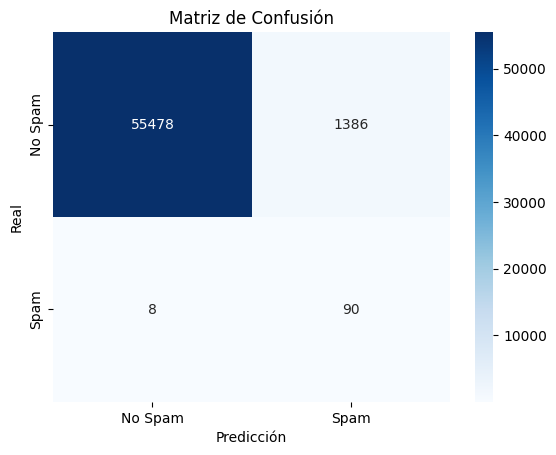

In [68]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Spam', 'Spam'],
            yticklabels=['No Spam', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

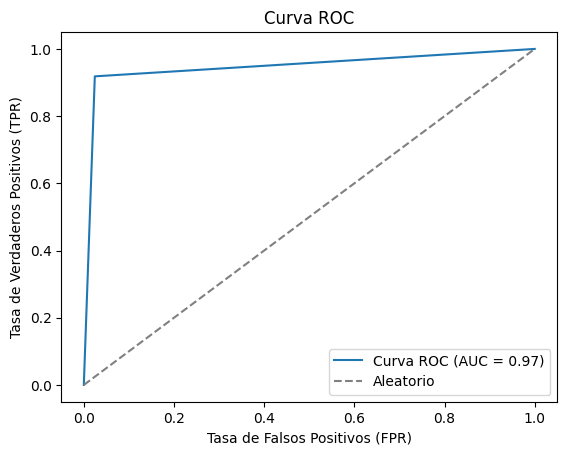

In [70]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

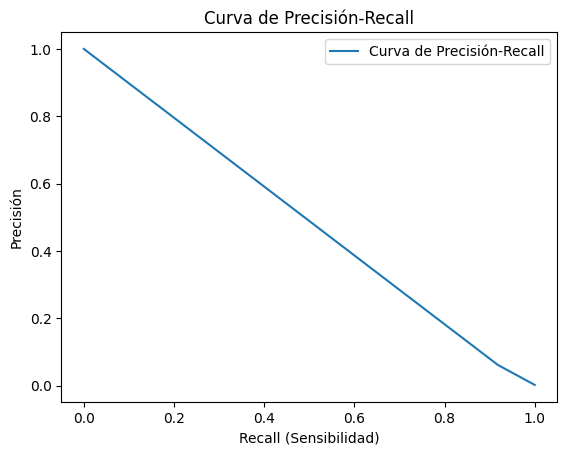

In [72]:
# Calcular la curva de Precisión-Recall
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred)

# Graficar la curva de Precisión-Recall
plt.plot(recall_vals, precision_vals, label='Curva de Precisión-Recall')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.legend()
plt.show()

Ahora se quiere hacer una prediccion con datos generados aleatoriamente.

In [76]:
# Crear una transacción nueva con el mismo número de columnas
new_transaction = pd.DataFrame(np.random.randn(1, X_train.shape[1]), columns=X_train.columns)

# Estandarizar la transacción usando el scaler entrenado
new_transaction_scaled = scaler.transform(new_transaction)

# Hacer la predicción
predicted_fraud = model.predict(new_transaction_scaled)
predicted_probability = model.predict_proba(new_transaction_scaled)[:, 1]

print(f"\nPredicción para la nueva transacción: {'Fraude' if predicted_fraud[0] == 1 else 'No Fraude'}")
print(f"Probabilidad de fraude: {predicted_probability[0]:.2f}")


Predicción para la nueva transacción: No Fraude
Probabilidad de fraude: 0.00


### Código con balance

Se hará uso del algoritmo SMOTE para hacer el balance

In [81]:
# Aplicar SMOTE antes de la estandarización
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Estandarizar después de SMOTE
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformar, no volver a ajustar

# Entrenar el modelo con los datos balanceados
model_smote = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_smote.fit(X_resampled_scaled, y_resampled)

# Predecir con el conjunto de prueba
y_pred_smote = model_smote.predict(X_test_scaled)

# Evaluar el modelo
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, model_smote.predict_proba(X_test_scaled)[:, 1])

print(f"Accuracy (SMOTE): {accuracy_smote}")
print(f"Confusion Matrix (SMOTE):\n{conf_matrix_smote}")
print(f"Classification Report (SMOTE):\n{class_report_smote}")
print(f"ROC AUC Score (SMOTE): {roc_auc_smote}")

Accuracy (SMOTE): 0.9898528843790597
Confusion Matrix (SMOTE):
[[56296   568]
 [   10    88]]
Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

ROC AUC Score (SMOTE): 0.9764816590676788


Con SMOTE, el modelo ha mejorado significativamente en la detección de fraudes.

Ahora hay un mayor f1-score haciendo que el modelo es más preciso en la detección de fraudes. La precisión ahora es del 13% sigue siendo baja porque hay muchos falsos positivos pero es mejor que el 6% que se tenía. 

SMOTE ayudó a mejorar la capacidad del modelo para detectar fraudes, aumentando su F1-score y recall, aunque todavía hay margen para mejorar la precisión.